# **Boosting Techniques**

**1. What is Boosting in Machine Learning?**

-> Boosting is an ensemble learning technique in machine learning that combines the output of several weak learners to form a strong learner. The idea is to train models sequentially, each one trying to correct the errors of its predecessor.

**2. How does Boosting differ from Bagging.**

-> Boosting and Bagging are both ensemble learning techniques used to improve model performance, but they differ in how they build and combine multiple models.

- Use Bagging when you want to reduce variance and avoid overfitting (e.g., with Random Forest).

- Use Boosting when you want to reduce bias and improve accuracy, but watch out for overfitting (e.g., XGBoost).

- Choose based on your problem: Bagging for stable results, Boosting for higher accuracy on clean data.

**3. What is the key idea behind AdaBoost.**

-> AdaBoost builds a strong classifier by focusing on mistakes made by previous weak learners, adjusting sample weights so that the next learner does better. It’s one of the earliest and most influential boosting algorithms, and it laid the groundwork for more advanced methods like Gradient Boosting and XGBoost.

**4. Explain the working of AdaBoost with an example.**

- AdaBoost trains weak learners sequentially.

- It increases focus on mistakes by updating sample weights.

- It combines weak learners using weighted votes based on their accuracy.

- In our example, even 2 simple stumps could build a powerful classifier.

**5. What is Gradient Boosting, and how is it different from AdaBoost.**

-> Gradient Boosting is an ensemble technique where models are built sequentially, and each new model is trained to predict the residual errors (i.e., what’s left over) of the combined previous models. It uses gradient descent to minimize a loss function (like MSE for regression or log-loss for classification).

- AdaBoost adjusts sample weights to focus on misclassified data.

- Gradient Boosting fits models to the gradients of the loss function (residuals).

- Gradient Boosting is more general, flexible, and widely used in practice.

**6. What is the loss function in Gradient Boosting.**

-> In Gradient Boosting, the loss function plays a central role—it guides how the model learns by measuring the difference between predictions and actual values. Each new weak learner (e.g., a small decision tree) is trained to minimize this loss, usually via gradient descent.

**7. How does XGBoost improve over traditional Gradient Boosting?**

XGBoost (Extreme Gradient Boosting) improves over traditional Gradient Boosting by introducing several performance enhancements, regularization techniques, and system optimizations that make it faster, more accurate, and more robust—especially for large-scale datasets.

**8. What is the difference between XGBoost and CatBoost.**

-> XGBoost and CatBoost are both advanced gradient boosting algorithms, widely used in machine learning for structured/tabular data. While they share the core idea of gradient boosting, they differ significantly in handling categorical data, speed, ease of use, and under-the-hood optimizations.

**9. What are some real-world applications of Boosting techniques?**

-> Boosting techniques are widely used because they:

- Handle complex, non-linear patterns.

- Work well with imbalanced datasets.

- Are highly accurate and interpretable.

- Can be used across classification, regression, and ranking tasks.

**10. How does regularization help in XGBoost?**

-> Regularization in XGBoost helps improve the model's generalization ability by preventing overfitting—especially important in models like gradient boosting which are prone to learning noise if left unchecked.



**11. What are some hyperparameters to tune in Gradient Boosting models?**

-> Tuning hyperparameters in Gradient Boosting models (like GradientBoostingClassifier, XGBoost, LightGBM, or CatBoost) is crucial for improving model performance, reducing overfitting, and speeding up training.

**12. What is the concept of Feature Importance in Boosting?**

->
- Feature importance in boosting quantifies how much each feature contributes to model predictions.

- Methods include gain, frequency, cover, and permutation.

- It helps with model interpretation, feature selection, and performance tuning.

**13. Why is CatBoost efficient for categorical data?**

-> CatBoost (short for Categorical Boosting) is particularly efficient and powerful for handling categorical data because it is designed specifically to process categorical features directly, without requiring manual preprocessing like one-hot or label encoding.

# **Practical**

**14. Train an AdaBoost Classifier on a sample dataset and print model accuracy.**

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on test set
y_pred = model.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")


AdaBoost Classifier Accuracy: 1.00


**15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).**

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 1. Load regression dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on test set
y_pred = model.predict(X_test)

# 6. Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"AdaBoost Regressor MAE: {mae:.2f}")


AdaBoost Regressor MAE: 0.60


**16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.**

Top 10 Important Features:
                 Feature  Importance
7    mean concave points    0.434897
27  worst concave points    0.273841
22       worst perimeter    0.050974
23            worst area    0.047995
21         worst texture    0.047193
20          worst radius    0.045435
26       worst concavity    0.022999
1           mean texture    0.018393
16       concavity error    0.015558
10          radius error    0.010003


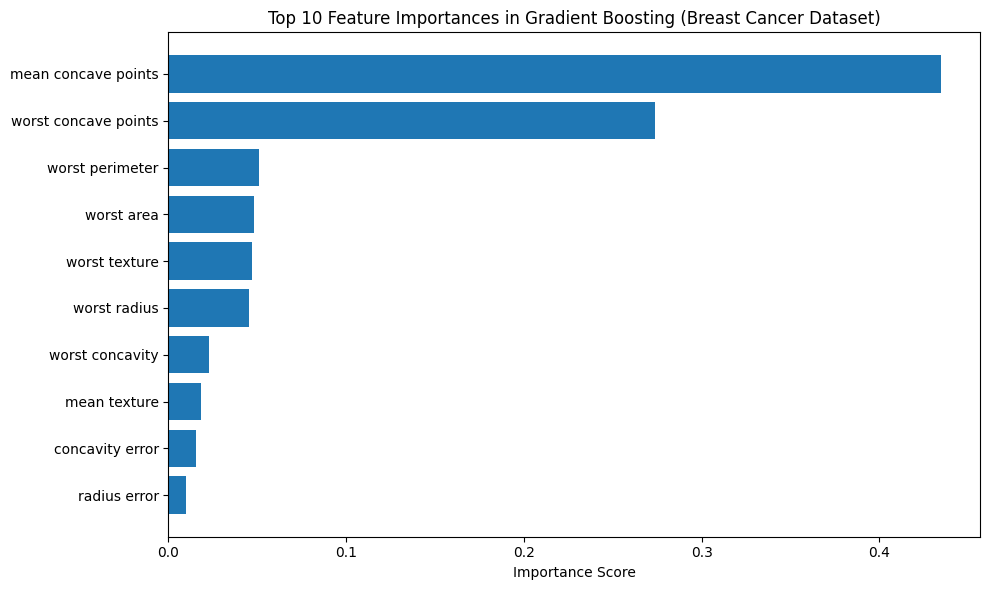

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Get feature importances
importances = model.feature_importances_

# 5. Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Print and plot
print("Top 10 Important Features:")
print(importance_df.head(10))

# 7. Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances in Gradient Boosting (Breast Cancer Dataset)')
plt.tight_layout()
plt.show()


**17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.**

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Load a regression dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate using R² Score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R² Score: {r2:.2f}")


Gradient Boosting Regressor R² Score: 0.78


**18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.**

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

# 4. XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# 5. Print accuracy comparison
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")
print(f"XGBoost Accuracy:         {xgb_acc:.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.96
XGBoost Accuracy:         0.95


**19. Train a CatBoost Classifier and evaluate using F1-Score.**

In [9]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,  # Suppress training output
    random_state=42
)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict on test data
y_pred = model.predict(X_test)

# 6. Evaluate using F1-Score
f1 = f1_score(y_test, y_pred)
print(f"CatBoost Classifier F1-Score: {f1:.2f}")


CatBoost Classifier F1-Score: 0.98


**20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).**

In [11]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the XGBoost Regressor
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    objective='reg:squarederror',
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regressor Mean Squared Error: {mse:.2f}")


XGBoost Regressor Mean Squared Error: 0.25


**21. Train an AdaBoost Classifier and visualize feature importance.**

AdaBoost Classifier Accuracy: 0.96


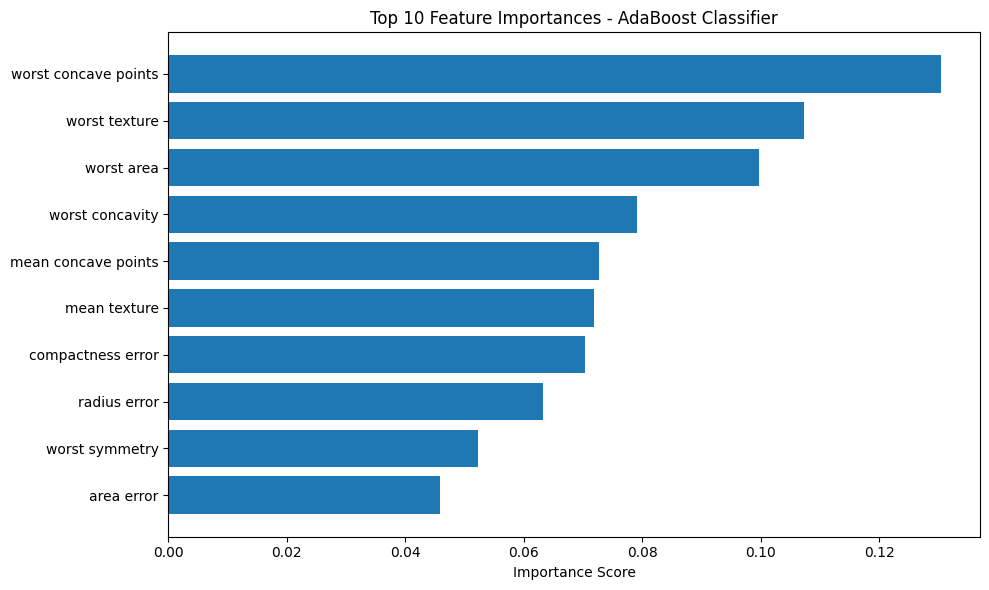

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train)

# 4. Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")

# 5. Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances - AdaBoost Classifier')
plt.tight_layout()
plt.show()


**22. Train a Gradient Boosting Regressor and plot learning curves.**

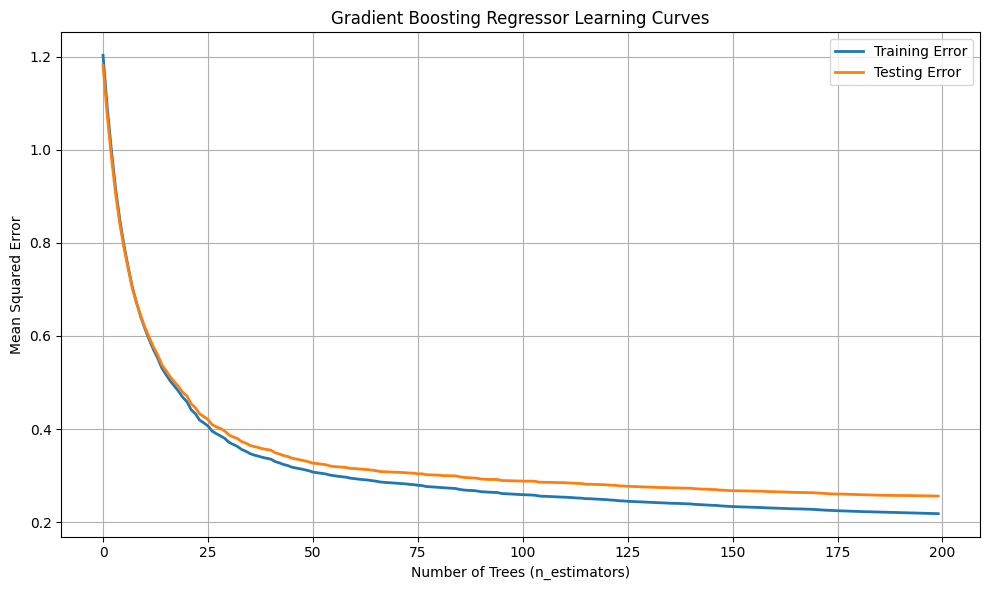

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the model
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 4. Fit the model
model.fit(X_train, y_train)

# 5. Get staged predictions to compute learning curves
train_errors = []
test_errors = []

for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# 6. Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label="Training Error", linewidth=2)
plt.plot(test_errors, label="Testing Error", linewidth=2)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Regressor Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**23. Train an XGBoost Classifier and visualize feature importance.**

XGBoost Classifier Accuracy: 0.95


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

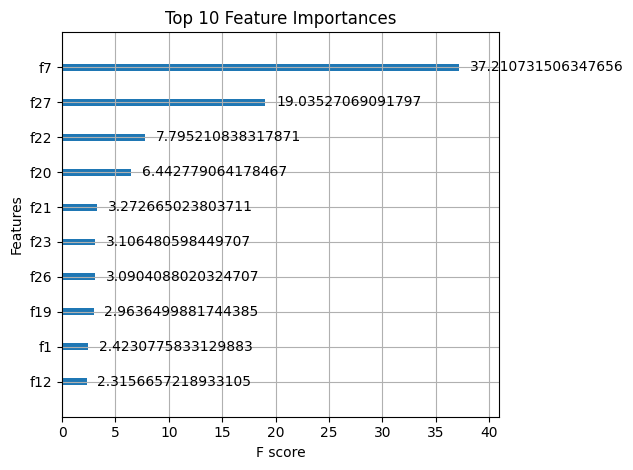

In [14]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train XGBoost Classifier
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# 4. Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")

# 5. Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='gain', max_num_features=10, title='Top 10 Feature Importances')
plt.tight_layout()
plt.show()


**24. Train a CatBoost Classifier and plot the confusion matrix.**

<Figure size 600x500 with 0 Axes>

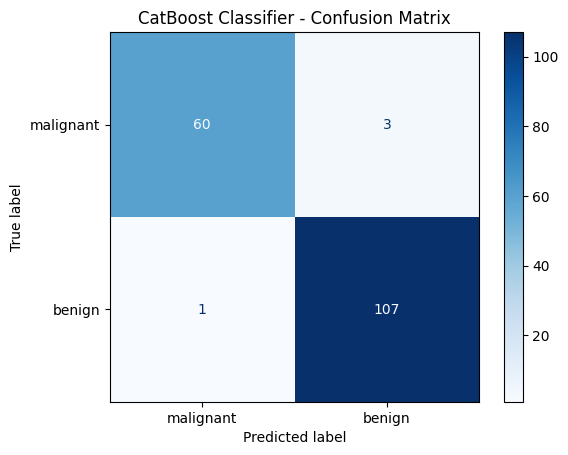

In [15]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,  # Suppress output
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predict on the test set
y_pred = model.predict(X_test)

# 5. Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# 6. Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("CatBoost Classifier - Confusion Matrix")
plt.grid(False)
plt.show()


**25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.**

n_estimators = 10, Accuracy = 0.9766
n_estimators = 25, Accuracy = 0.9708
n_estimators = 50, Accuracy = 0.9708
n_estimators = 75, Accuracy = 0.9766
n_estimators = 100, Accuracy = 0.9708
n_estimators = 150, Accuracy = 0.9766
n_estimators = 200, Accuracy = 0.9825


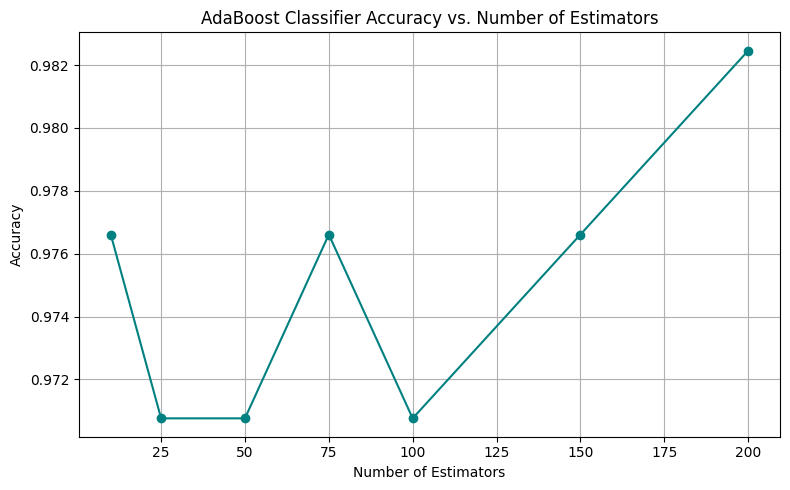

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define range of estimators to test
estimators_list = [10, 25, 50, 75, 100, 150, 200]
accuracy_scores = []

# 4. Train AdaBoost models with different numbers of estimators
for n in estimators_list:
    model = AdaBoostClassifier(n_estimators=n, learning_rate=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"n_estimators = {n}, Accuracy = {acc:.4f}")

# 5. Plot accuracy vs. number of estimators
plt.figure(figsize=(8, 5))
plt.plot(estimators_list, accuracy_scores, marker='o', color='teal')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.grid(True)
plt.tight_layout()
plt.show()


**26. Train a Gradient Boosting Classifier and visualize the ROC curve.**

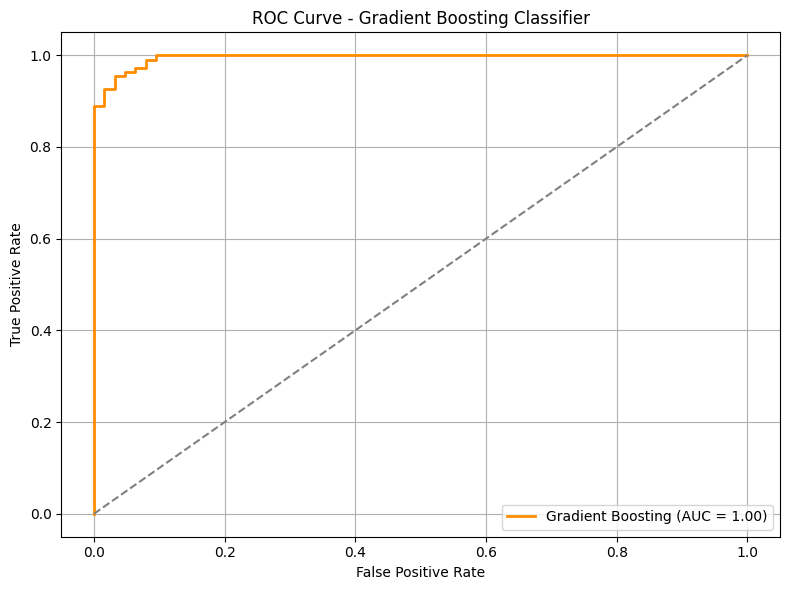

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 4. Predict probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# 5. Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})", color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


**27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.**

In [18]:
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define the model
xgb = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    objective='reg:squarederror',
    random_state=42
)

# 4. Define parameter grid for learning_rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 6. Fit GridSearchCV
grid_search.fit(X_train, y_train)

# 7. Best parameters and model
best_lr = grid_search.best_params_['learning_rate']
print(f"Best learning rate: {best_lr}")

# 8. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error with best learning rate ({best_lr}): {mse:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best learning rate: 0.3
Test Mean Squared Error with best learning rate (0.3): 0.2280


**28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.**

In [19]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np

# 1. Create an imbalanced dataset
X, y = make_classification(
    n_samples=5000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalance: 90% class 0, 10% class 1
    random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train CatBoost without class weights
model_no_weights = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
f1_no_weights = f1_score(y_test, y_pred_no_weights)

# 4. Compute class weights manually
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}
print(f"Computed class weights: {class_weights_dict}")

# 5. Train CatBoost with class weights
model_with_weights = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    class_weights=class_weights_dict,
    verbose=0,
    random_state=42
)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)
f1_with_weights = f1_score(y_test, y_pred_with_weights)

# 6. Compare results
print("\n--- Performance Comparison ---")
print(f"F1-Score WITHOUT Class Weights: {f1_no_weights:.4f}")
print(f"F1-Score WITH Class Weights:    {f1_with_weights:.4f}")

# 7. Optional: Full classification reports
print("\nClassification Report WITHOUT Class Weights:")
print(classification_report(y_test, y_pred_no_weights))

print("Classification Report WITH Class Weights:")
print(classification_report(y_test, y_pred_with_weights))


Computed class weights: {0: np.float64(0.5578578259483583), 1: np.float64(4.820936639118457)}

--- Performance Comparison ---
F1-Score WITHOUT Class Weights: 0.9180
F1-Score WITH Class Weights:    0.9012

Classification Report WITHOUT Class Weights:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1345
           1       0.93      0.90      0.92       155

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Classification Report WITH Class Weights:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1345
           1       0.86      0.94      0.90       155

    accuracy                           0.98      1500
   macro avg       0.93      0.96      0.94      1500
weighted avg       0.98      0.98      0.98      1500



**29. Train an AdaBoost Classifier and analyze the effect of different learning rates.**

Learning Rate = 0.01, Accuracy = 0.9415
Learning Rate = 0.05, Accuracy = 0.9591
Learning Rate = 0.10, Accuracy = 0.9591
Learning Rate = 0.30, Accuracy = 0.9649
Learning Rate = 0.50, Accuracy = 0.9649
Learning Rate = 1.00, Accuracy = 0.9708
Learning Rate = 1.50, Accuracy = 0.9708


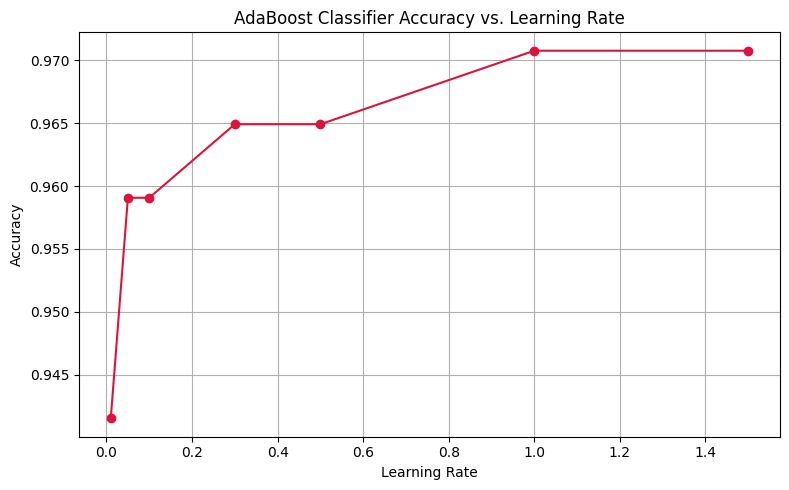

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5, 1.0, 1.5]
accuracies = []

# 4. Train AdaBoost models with different learning rates
for lr in learning_rates:
    model = AdaBoostClassifier(
        n_estimators=50,
        learning_rate=lr,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning Rate = {lr:.2f}, Accuracy = {acc:.4f}")

# 5. Plot learning rate vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', color='crimson')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


**30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.**

In [21]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder

# 1. Load multi-class dataset (Iris)
data = load_iris()
X = data.data
y = data.target

# 2. Encode labels if needed (already numeric in Iris)
# y = LabelEncoder().fit_transform(y)  # Uncomment if labels are strings

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Train XGBoost Classifier
model = XGBClassifier(
    objective='multi:softprob',   # Returns probabilities for each class
    num_class=3,                  # Number of classes in the dataset
    eval_metric='mlogloss',       # Use log-loss as evaluation metric
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Predict class probabilities
y_proba = model.predict_proba(X_test)

# 6. Compute log-loss
loss = log_loss(y_test, y_proba)
print(f"XGBoost Multi-class Log-Loss: {loss:.4f}")


XGBoost Multi-class Log-Loss: 0.2573


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
